# Linear regression model 

Building a simple linear regression model to predict Sales of an advertising company with appropriate predictor variables

# 1. Reading and visualising data 

In [4]:
import numpy as np
import pandas as pd

In [5]:
advertising= pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Visualising data 

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

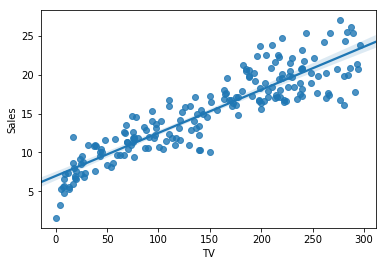

In [10]:
sns.regplot(x="TV",y="Sales",data=advertising)

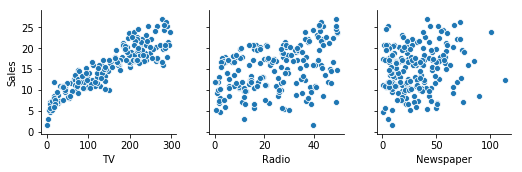

In [11]:
sns.pairplot(data=advertising,x_vars=(["TV","Radio","Newspaper"]),y_vars="Sales")

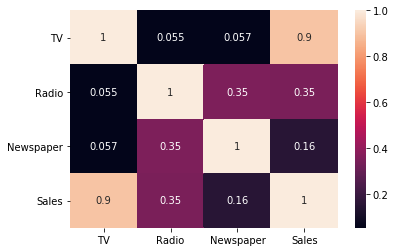

In [12]:
sns.heatmap(advertising.corr(),annot=True)

As seen from the pair plot and heatmap, variable TV is highly correlated with sales hence using TV as a feature variable to build the model

# 2. Performing simple linear regression 
#### equation : y= mx+c 

  y= response,

  m=slope,

  c=intercept, 

  x=feature variable (TV)
 
#### Sales= m* TV +c

In [13]:
import statsmodels
import statsmodels.api as sm

In [14]:
x= advertising["TV"]
y=advertising["Sales"]

### Spliting data into train and test set

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
x_train.head() 

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

# 3. Building the model

In [32]:
x_train_sm= sm.add_constant(x_train)

lr= sm.OLS(y_train,x_train_sm).fit()

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.52e-52
Time:                        18:15:28   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Looking at some key statistics from the summary

1.The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance
2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

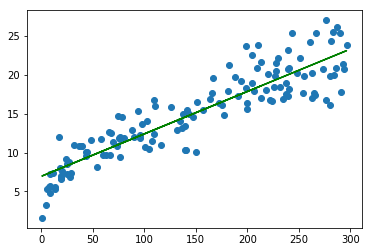

In [36]:
plt.scatter(x_train,y_train)
y_train_pred= 0.0545*x_train + 6.9487
plt.plot(x_train,y_train_pred,"g")

# 4.Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

Text(0.5,1,'Residual plot')

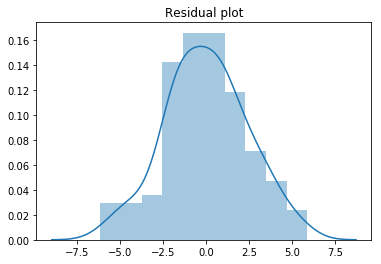

In [20]:
res= y_train-y_train_pred

plt.figure()
sns.distplot(res)
plt.title("Residual plot")

The residuals are following the normally distributed with a mean 0.

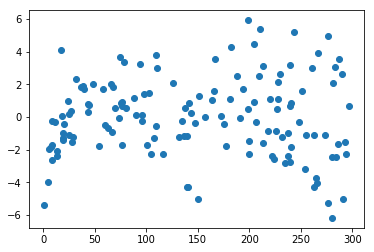

In [21]:
plt.scatter(x_train, res)

As there are no visible patterns in the scatter plot of residuals hence it is concluded that the model fit isn't by chance, and has decent predictive power.  

# 5.Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [37]:
x_test_sm = sm.add_constant(x_test)

y_test_pred= 0.0545*x_test+ 6.9487


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [24]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7921031601245658

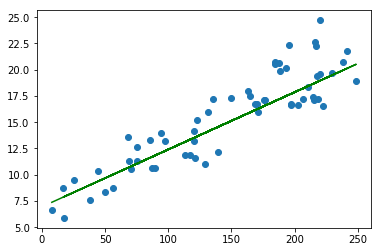

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_test_pred,"g")

Using SKlearn model

In [26]:
from sklearn.linear_model import LinearRegression
#reshaping

x_train_lm=x_train.values.reshape(-1,1)
x_test_lm= x_test.values.reshape(-1,1)

lm= LinearRegression()
lm.fit(x_train_lm,y_train)

#lm.fit(x_train_lm,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print lm.coef_
print lm.intercept_

[0.05454575]
6.948683200001357


In [42]:
y_train_pred= 0.05454575*x_train_lm + 6.948683200001357
y_test_pred= 0.05454575*x_test_lm + 6.948683200001357
print r2_score(y_true=y_train, y_pred=y_train_pred )
print r2_score(y_true=y_test, y_pred=y_test_pred)


0.8157933136480305
0.7921031299405574
